请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import make_scorer,accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['FZSongYi-Z13S']
#解决负号无法正常显示的问题
plt.rcParams['axes.unicode_minus']=False


In [2]:
#读入数据，划分训练集和测试集
data=pd.read_csv("高斯贝叶斯.csv")
print(data.info)  #查看data数据信息
features=["注册时长","营收收入","成本"]
x=data[features]
y=data["是否续约"]
#划分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<bound method DataFrame.info of          ID  注册时长  营收收入        成本 是否续约
0     10001    29    46   8.33316   续约
1     10002    58   105  18.24564   续约
2     10003    36    55   3.13296   续约
3     10004    32    28   9.96705   续约
4     10005    26    32   7.19040  不续约
...     ...   ...   ...       ...  ...
1495  11496    36    87   9.76910   续约
1496  11497    39    45   1.65636   续约
1497  11498    26    17   0.54784   续约
1498  11499    36    43   6.36115   续约
1499  11500    28    25   1.48944   续约

[1500 rows x 5 columns]>


In [3]:
# 用于绘制数据特征分布
def DrawHist(s):
    l = len(s.columns)
    fig = plt.figure(figsize=(10,l*3))
    for i in range(0,1):
        col_name = s.columns[i]
        ax1 = fig.add_subplot(l,1,(i+1))  # 创建子图
        ax1.set_title(col_name)
        s[col_name].hist(bins=30,ax=ax1)
        s[col_name].plot(kind = 'kde', secondary_y=True,ax=ax1)
        plt.grid()

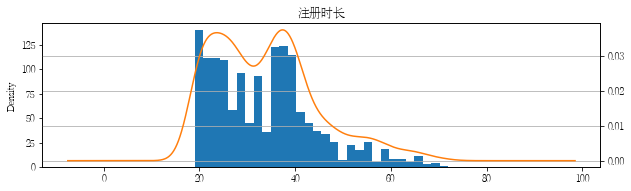

In [4]:
#绘制数据分布，观察数据分布是否符合高斯分布
DrawHist(x)

In [5]:
#建立高斯贝叶斯模型，使用全部数据进行K折交叉验证模型得分，K=10
gaussianNB=GaussianNB()
#K折交叉验证
kcvs=cross_val_score(gaussianNB,x,y,cv=10,scoring=make_scorer(accuracy_score))
#求10次准确率的平均分
kcvs_mean=kcvs.mean()
print("kcvs_mean:{}".format(kcvs_mean))

kcvs_mean:0.6673333333333333


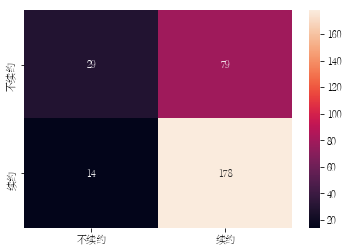

In [6]:
labels=["不续约","续约"]
#使用训练集数据，训练模型
gaussianNB.fit(x_train,y_train)
#使用测试集数据，模型预测
y_test_predict=gaussianNB.predict(x_test)
#绘制混淆矩阵
Cm=confusion_matrix(y_test,y_test_predict,labels=labels)
Cm=pd.DataFrame(Cm,columns=labels,index=labels) #给混淆矩阵坐标轴加上标签
#绘制热力图
sns.heatmap(Cm,annot=True,fmt="d")  #fmt="d" 让数值不要以科学计数法显示

In [7]:
# 对华北地区进行预测
data_north = pd.read_csv("华北地区.csv")
print(data_north.describe())

                 ID        注册时长        营收收入          成本
count    325.000000  325.000000  325.000000  325.000000
mean   20163.000000   33.833846   56.769231    6.200387
std       93.963645   10.973738   51.103311    7.912646
min    20001.000000   19.000000   13.000000    0.513600
25%    20082.000000   25.000000   28.000000    1.737680
50%    20163.000000   33.000000   40.000000    3.707550
75%    20244.000000   40.000000   64.000000    7.549920
max    20325.000000   68.000000  448.000000   71.801280


In [8]:
data_north["预测续约"] = gaussianNB.predict(data_north[["注册时长","营收收入","成本"]])   # 预测是否续约
data_north

,ID,注册时长,营收收入,成本,预测续约
0,20001,29,46,8.33316,续约
1,20002,26,32,7.19040,续约
2,20003,59,172,10.11150,续约
3,20004,22,24,0.95979,不续约
4,20005,56,87,17.97600,续约
...,...,...,...,...,...
320,20321,21,22,2.08971,续约
321,20322,36,62,11.74218,续约
322,20323,32,29,4.73368,续约
323,20324,28,66,0.67410,续约
